In [4]:
from mouseBehavior import mouseBehaviorData as mbd
import numpy as np
import os, glob
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
#animals neuropix pipeline has done so far --> handoff ready in behavior
mouseInfoNpx = ('468670', '470005', '478202', '477121', '473254', 
             '477120', '487461', '473248', '487460', '477810',
             '476815', '485051', '489138', '495800',
            '492651', '495662' '496639')
#animals S+C have done so far
mouseInfoSC = ('390339', '385531', '385533', '394873', 
               '403472', '403468', '409096', '408528', 
               '412624', '408527', '416576', '416656', 
               '417882', '421323', '422856', '422699', 
               '423749', '423750', '423744', '423745',
               '423746', '427937', '429083', '429084',
               '432291', '442594', '459521', '461027',
               '472392', '472395', '481531', '481356',
               '471727', '473189', '474732', '479219',
               '484106', '486622', '486635', '490193',
               '490194')
mouseInfoOphys = ('431018', '431023', '431245', '431246',
                  '431249', '431252', '432375', '433245', 
                  '433248', '435838', '436662', '437204',
                  '440298', '442709', '445002', '445270',
                  '445271', '447663', '448897', '448900',
                  '449441', '450471', '450705', '450710',
                  '451787', '451790', '453909', '453911',
                  '453913', '456564', '456912', '456915',
                  '456916', '456917', '457766', '458151',
                  '458155', '459768', '459773', '459777',
                  '460746', '461946', '462544', '462885',
                  '462887', '464204', '464206', '464207',
                  '467190', '472271', '472873', '472874',
                  '476067', '476631', '477052', '479458',
                  '479461', '479835', '479839', '481295',
                  '483803', '484408', '484627', '484631',
                  '485152', '488458', '491060')
#animals Handoff ready in F1
mouseInfoRigF1 = ('492396', '489065', '472874', '492396', 
                  '479461', '477202', '464206', '462885', 
                  '461946', '490193', '486635', '486632', 
                  '485152', '485051', '484106', '474683', 
                  '453909', '452102', '452100',)
mouseInfoRigF1Lapsed = ('490193', '486635', '486632')
mouseInfoRigF4 = ('489065', '477052', '476067', '467954', 
                  '460746', '460746', '492992', '488458',
                  '485152', '482853', '471819', '456917', 
                  '456912', '436662')
#mouseInfoRigF4Lapsed = ('436662', ) can look at page 8 if more wanted
mouseInfoRigF5 = ('489065', '472873', '498972', '492651',
                  '486632', '484627', '481356', '481355', 
                  '472395', '461027', '453990', '448060', 
                  '431444', '440634')
#stopped F5 at page 8
mouseInfoNpx = np.unique(mouseInfoNpx)
mouse_info_list = [mouseInfoNpx]#, mouseInfoSC, mouseInfoOphys, mouseInfoRigF1, mouseInfoRigF1Lapsed, mouseInfoRigF4, mouseInfoRigF5
print('done')

done


In [6]:
#checks to see if a mouse behavior object already exists for given mouse so it doesn't have to refetch data from the network
def checkforpickle(directory, mouseID):
    pkllist = [f for f in os.listdir(directory) if '.pkl' in f]
    mouseID = str(mouseID)
    pklpath = None
    for pkl in pkllist:
        if pkl[:6]==mouseID:
            pklpath = os.path.join(directory, pkl)
    return pklpath
print('donezoeee')


donezoeee


In [7]:
#Directory where the mouse object pkls are stored
print('here')
pkldir = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\Ramirez\behavior_sessions"

#Directory where the dataframes summarizing behavior are stored (if saved separately)
dataframe_save_dir = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\Ramirez\behavior_sessions\dataframes"

dflist = []
mouseids = []
for mouseInfo in mouse_info_list:
    mouseInfo = np.unique(mouseInfo) 
    print('pulling_pkls for :'+str(mouseInfo))
    for mouse in mouseInfo:
        if isinstance(mouseInfo[0], tuple):
            mouse = mouse[0]
        print(mouse)
        #First look to see if there's already a pkl file with this mouse' data
        pklpath = checkforpickle(pkldir, mouse)
        try:
            # get pkl if it already exists
            if pklpath is not None:
                #TODO: write code that checks whether most recent date lines up with LIMS so we can then 
                m = mbd()
                m.loadFromPickle(pklpath)
    #             m.add_weight_and_water_history()
    #             m.calculate_behavior_metrics()
    #             m.add_metadata_to_dataframe()

            #otherwise make a new one
            else:
                m = mbd(mouse_id=mouse, daysBeforeHandoff=100)
                m.buildBehaviorDataframe(all_sessions=True)

            m.saveDirectory = pkldir
            m.saveToPickle()
            m.save_dataframe_separately(dataframe_save_dir)
            dflist.append(m.beh_df)
            mouseids.append(mouse)
            print('done')
        except:
            print('failed to load data for mouse ' + mouse)
            continue
print('done')

here
pulling_pkls for :['468670' '470005' '473248' '473254' '476815' '477120' '477121' '477810'
 '478202' '485051' '487460' '487461' '489138' '492651' '495662496639'
 '495800']
468670
done
470005
failed to load data for mouse 470005
473248
failed to load data for mouse 473248
473254
done
476815
done
477120
done
477121
done
477810
done
478202
done
485051
done
487460
done
487461
failed to load data for mouse 487461
489138
done
492651
done
495662496639
failed to load data for mouse 495662496639
495800
done
done


save population df with all mice concatenated

In [8]:
popdf = pd.concat(dflist, keys=mouseInfoNpx)
print('done')
print('donezo')

done
donezo


rig
B4            6
B5           27
D1            7
D2           11
D3            3
D4           20
D5            4
D6           32
F1           17
F2           20
F3            3
F5           19
G1            1
G2           19
NP.0-Stim    30
NP1           6
Name: id, dtype: int64

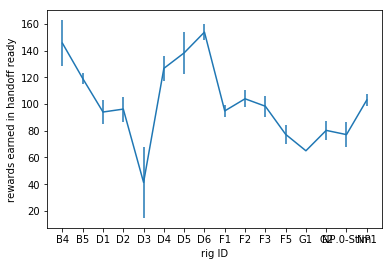

In [9]:
# example rig by rig analysis
handoffready = popdf['stage'].str.contains('TRAINING_5_images_A_handoff_ready')
hrdf = popdf.loc[handoffready]

rig_rewards = hrdf.groupby(by='rig').mean()['earned_rewards']
rig_dprime = hrdf.groupby(by='rig').mean()['engaged_dprime']

rigs = hrdf.groupby(by='rig').mean().index.to_list()
fig, ax = plt.subplots()
#ax.plot(hrdf.groupby(by='session_day_of_week').mean()['earned_rewards'])
ax.errorbar(np.arange(len(rig_rewards)), rig_rewards, yerr=hrdf.groupby(by='rig').sem()['earned_rewards'])
ax.set_xlabel('rig ID')
ax.set_ylabel('rewards earned in handoff ready')

ax.set_xticks(np.arange(len(rigs)))
ax.set_xticklabels(rigs)

hrdf.groupby('rig')['id'].count()

In [ ]:
# age vs. rewards
handoffready = popdf['stage'].str.contains('TRAINING_5_images_A_handoff_ready')
hrdf = popdf.loc[handoffready]

rig_rewards = hrdf.groupby(by='rig').mean()['earned_rewards']
rig_dprime = hrdf.groupby(by='rig').mean()['engaged_dprime']

rigs = hrdf.groupby(by='rig').mean().index.to_list()
fig, ax = plt.subplots()
#ax.plot(hrdf.groupby(by='session_day_of_week').mean()['earned_rewards'])
ax.errorbar(np.arange(len(rig_rewards)), rig_rewards, yerr=hrdf.groupby(by='rig').sem()['earned_rewards'])
ax.set_xlabel('rig ID')
ax.set_ylabel('rewards earned in handoff ready')

ax.set_xticks(np.arange(len(rigs)))
ax.set_xticklabels(rigs)

hrdf.groupby('rig')['id'].count()

In [10]:
#taken from Corbetts earlier scripts

saved_df_dir = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\Ramirez\behavior_sessions"
df_paths = [os.path.join(saved_df_dir, f) for f in os.listdir(saved_df_dir)]

mouse_dict = {a:{} for a in [f.split('\\')[-1][:6] for f in df_paths]}
for df_path in df_paths:
    m = mbd()
    m.loadFromPickle(df_path)
    m.buildBehaviorDataframe(all_sessions=True)
    
    mouse_dict[m.mouse_id]['df_obj'] = m

print('finished')

mouseBehavior.py:210: RuntimeWarning: invalid value encountered in divide
  return responses/float(denom)
mouseBehavior.py:169: RuntimeWarning: invalid value encountered in divide
  faRate = trial_number_limit(fas/float(fas+crs), fas+crs)
C:\Users\taminar\AppData\Local\Continuum\anaconda3\envs\lims\lib\site-packages\scipy\stats\_distn_infrastructure.py:1914: RuntimeWarning: invalid value encountered in greater
  cond1 = (0 < q) & (q < 1)
C:\Users\taminar\AppData\Local\Continuum\anaconda3\envs\lims\lib\site-packages\scipy\stats\_distn_infrastructure.py:1914: RuntimeWarning: invalid value encountered in less
  cond1 = (0 < q) & (q < 1)
C:\Users\taminar\AppData\Local\Continuum\anaconda3\envs\lims\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer

EOFError: 

In [ ]:
#taken from Corbetts earlier scripts
fig, ax = plt.subplots()
ax.plot(m.beh_df['session_datetime_local'], m.beh_df['Wt_g'], 'ko')
ax.set_title('Wt_g')

fig, ax = plt.subplots()
ax.plot(m.beh_df['session_datetime_local'], m.beh_df['WE_ml'], 'bo')
ax.plot(m.beh_df['session_datetime_local'], m.beh_df['WS_ml'], 'ro')
ax.legend(['WE_ml', 'WS_ml'])

fig, ax = plt.subplots()
ax.plot(m.beh_df['session_datetime_local'], np.array(m.beh_df['Wt_g'].astype(float) - m.beh_df['WE_ml'].astype(float)), 'go')
ax.set_title('Wt_g - WE_ml: inferred pre-session weight')

In [8]:
#taken from Corbetts earlier scripts
%matplotlib notebook
import numpy as np
fig, ax = plt.subplots()
fig.suptitle('All mice individually')
dayOfWeek = []
reward_num = []
for mouse in mouse_dict:
    m = mouse_info_list[mouse]['df_obj']
    
    qualifying = m.beh_df['stage'].str.contains('handoff_ready') & m.beh_df['rig'].str.contains('NP')
    df = m.beh_df.loc[qualifying]
    
    dayOfWeek.extend(df['session_day_of_week'].values)
    reward_num.extend(df['cumulative_rewards'].values)
    
    ax.plot(df.groupby('session_day_of_week', as_index=False)['cumulative_rewards'].mean()['cumulative_rewards'], 'o-')

ax.set_ylabel('Num. Rewards')
ax.set_xticks(np.arange(5))
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

dayOfWeek = np.array(dayOfWeek)
reward_num = np.array(reward_num)

r_per_d = [reward_num[dayOfWeek==d].mean() for d in np.unique(dayOfWeek)]
ax.plot(np.unique(dayOfWeek), r_per_d, 'ko', ms=10)



# fig, ax = plt.subplots()
# fig.suptitle('Averaged Over Mice')

# ax.set_ylabel('Num. Rewards')
# ax.set_xticks(np.arange(5))
# ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
# ax.set_ylim([0, np.max(r_per_d)*1.2])

<IPython.core.display.Javascript object>

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
#Directory where the mouse object pkls are stored
pkldir = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\Ramirez\behavior_sessions"

#Directory where the dataframes summarizing behavior are stored (if saved separately)
dataframe_save_dir = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\Ramirez\behavior_sessions\dataframes"

dflist = []
mouseids = []
for mouse in mouseInfoSC:
    if isinstance(mouseInfoSC[0], tuple):
        mouse = mouse[0]
    print(mouse)
    
    #First look to see if there's already a pkl file with this mouse' data
    pklpath = checkforpickle(pkldir, mouse)
    try:
        # get pkl if it already exists
        if pklpath is not None:
            m = mbd()
            m.loadFromPickle(pklpath)
#             m.add_weight_and_water_history()
#             m.calculate_behavior_metrics()
#             m.add_metadata_to_dataframe()
        
        #otherwise make a new one
        else:
            m = mbd(mouse_id=mouse, daysBeforeHandoff=100)
            m.buildBehaviorDataframe(all_sessions=True)
            
        m.saveDirectory = pkldir
        m.saveToPickle()
        m.save_dataframe_separately(dataframe_save_dir)
        dflist.append(m.beh_df)
        mouseids.append(mouse)
    except:
        print('failed to load data for mouse ' + mouse)
        continue
for mouse in mouseInfoOphys:
    if isinstance(mouseInfoOphys[0], tuple):
        mouse = mouse[0]
    print(mouse)
    
    #First look to see if there's already a pkl file with this mouse' data
    pklpath = checkforpickle(pkldir, mouse)
    try:
        # get pkl if it already exists
        if pklpath is not None:
            m = mbd()
            m.loadFromPickle(pklpath)
#             m.add_weight_and_water_history()
#             m.calculate_behavior_metrics()
#             m.add_metadata_to_dataframe()
        
        #otherwise make a new one
        else:
            m = mbd(mouse_id=mouse, daysBeforeHandoff=100)
            m.buildBehaviorDataframe(all_sessions=True)
            
        m.saveDirectory = pkldir
        m.saveToPickle()
        m.save_dataframe_separately(dataframe_save_dir)
        dflist.append(m.beh_df)
        mouseids.append(mouse)
    except:
        print('failed to load data for mouse ' + mouse)
        continue
for mouse in mouseInfoRigF1:
    if isinstance(mouseInfoRigF1[0], tuple):
        mouse = mouse[0]
    print(mouse)
    
    #First look to see if there's already a pkl file with this mouse' data
    pklpath = checkforpickle(pkldir, mouse)
    try:
        # get pkl if it already exists
        if pklpath is not None:
            m = mbd()
            m.loadFromPickle(pklpath)
#             m.add_weight_and_water_history()
#             m.calculate_behavior_metrics()
#             m.add_metadata_to_dataframe()
        
        #otherwise make a new one
        else:
            m = mbd(mouse_id=mouse, daysBeforeHandoff=100)
            m.buildBehaviorDataframe(all_sessions=True)
            
        m.saveDirectory = pkldir
        m.saveToPickle()
        m.save_dataframe_separately(dataframe_save_dir)
        dflist.append(m.beh_df)
        mouseids.append(mouse)
    except:
        print('failed to load data for mouse ' + mouse)
        continue
for mouse in mouseInfoRigF4:
    if isinstance(mouseInfoRigF4[0], tuple):
        mouse = mouse[0]
    print(mouse)
    
    #First look to see if there's already a pkl file with this mouse' data
    pklpath = checkforpickle(pkldir, mouse)
    try:
        # get pkl if it already exists
        if pklpath is not None:
            m = mbd()
            m.loadFromPickle(pklpath)
#             m.add_weight_and_water_history()
#             m.calculate_behavior_metrics()
#             m.add_metadata_to_dataframe()
        
        #otherwise make a new one
        else:
            m = mbd(mouse_id=mouse, daysBeforeHandoff=100)
            m.buildBehaviorDataframe(all_sessions=True)
            
        m.saveDirectory = pkldir
        m.saveToPickle()
        m.save_dataframe_separately(dataframe_save_dir)
        dflist.append(m.beh_df)
        mouseids.append(mouse)
    except:
        print('failed to load data for mouse ' + mouse)
        continue
for mouse in mouseInfoRigF5:
    if isinstance(mouseInfoRigF5[0], tuple):
        mouse = mouse[0]
    print(mouse)
    
    #First look to see if there's already a pkl file with this mouse' data
    pklpath = checkforpickle(pkldir, mouse)
    try:
        # get pkl if it already exists
        if pklpath is not None:
            m = mbd()
            m.loadFromPickle(pklpath)
#             m.add_weight_and_water_history()
#             m.calculate_behavior_metrics()
#             m.add_metadata_to_dataframe()
        
        #otherwise make a new one
        else:
            m = mbd(mouse_id=mouse, daysBeforeHandoff=100)
            m.buildBehaviorDataframe(all_sessions=True)
            
        m.saveDirectory = pkldir
        m.saveToPickle()
        m.save_dataframe_separately(dataframe_save_dir)
        dflist.append(m.beh_df)
        mouseids.append(mouse)
    except:
        print('failed to load data for mouse ' + mouse)
        continue